**Nama : Yohan Permana**

In [1]:
!pip install -q kaggle
#digunakan untuk menginstal paket Python bernama "kaggle" menggunakan perintah pip dari dalam lingkungan Jupyter Notebook atau notebook berbasis Python lainnya.

In [2]:
# digunakan untuk mengunggah file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yohanpermanautm","key":"96b272946aaf5c7a832385bc9086a36e"}'}

In [3]:
#digunakan untuk membuat dan mengonfigurasi direktori .kaggle serta mengelola file kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets list

ref                                                              title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
hummaamqaasim/jobs-in-data                                       Jobs and Salaries in Data Science            76KB  2023-12-25 20:03:32           5873        105  1.0              
thedrcat/daigt-v2-train-dataset                                  DAIGT V2 Train Dataset                       29MB  2023-11-16 01:38:36           4206        326  1.0              
nelgiriyewithana/new-york-housing-market                         New York Housing Market                     271KB  2024-01-06 16:41:00           1697         63  1.0              
jacksondivakarr/car-crash-dataset                                Car Crash Dataset             

In [5]:
#Perintah ini digunakan untuk mengunduh dataset dengan nama translated-animals10 dari Kaggle menggunakan perintah kaggle datasets download.
!kaggle datasets download -d madisona/translated-animals10

100% 586M/586M [00:07<00:00, 110MB/s]
100% 586M/586M [00:07<00:00, 87.3MB/s]


In [6]:
# Membuat direktori baru dengan nama "animals"
!mkdir animals

# Mengekstrak isi dari file zip "translated-animals10.zip" ke dalam direktori "animals"
# -qq: Mode diam (quiet), mengurangi output yang ditampilkan
# -d animals: Menunjukkan direktori tempat file zip diekstrak
!unzip -qq translated-animals10.zip -d animals

# Menampilkan daftar isi dari direktori "animals"
!ls animals


animals10


In [7]:
# Menampilkan daftar isi dari direktori "raw-img" yang berada di dalam "animals/animals10"
!ls animals/animals10/raw-img/


butterfly  cat	chicken  cow  dog  elephant  horse  sheep  spider  squirrel


In [8]:
import os

# Definisikan path ke direktori "raw-img" yang berada di dalam "animals/animals10"
animals_path = '/content/animals/animals10/raw-img/'

# Gunakan os.listdir() untuk mendapatkan daftar isi dari direktori
animal_files = os.listdir(animals_path)

# Tampilkan daftar isi
print(animal_files)


['horse', 'dog', 'sheep', 'chicken', 'butterfly', 'elephant', 'squirrel', 'cat', 'spider', 'cow']


In [9]:
import os
import shutil

# Tentukan path ke direktori "raw-img" yang berada di dalam "animals/animals10"
animals_path = '/content/animals/animals10/raw-img/'

# Daftar hewan yang akan diabaikan
ignore_animals = ['squirrel', 'cat', 'butterfly', 'sheep', 'cow', 'horse']

# Iterasi melalui daftar hewan yang akan diabaikan
for animal in ignore_animals:
    animal_path = os.path.join(animals_path, animal)

    # Hapus direktori hewan yang diabaikan menggunakan shutil.rmtree
    if os.path.exists(animal_path):
        shutil.rmtree(animal_path)
    else:
        print(f"Directory '{animal}' not found.")

# Tampilkan pesan setelah menghapus direktori
print("Ignored animals removed successfully.")


Ignored animals removed successfully.


In [10]:
import os

# Tentukan path ke direktori "raw-img" yang berada di dalam "animals/animals10"
animals_path = '/content/animals/animals10/raw-img/'

# Dapatkan daftar isi dari direktori "raw-img"
list_animals = os.listdir(animals_path)

# Tampilkan daftar isi
print(list_animals)


['dog', 'chicken', 'elephant', 'spider']


In [11]:
!pip install tabulate
from PIL import Image
import os
from tabulate import tabulate

# Tentukan path ke direktori "raw-img" yang berada di dalam "animals/animals10"
animals_path = '/content/animals/animals10/raw-img/'

# Dapatkan daftar isi dari direktori "raw-img"
list_animals = os.listdir(animals_path)

# Inisialisasi variabel total
total = 0

# Inisialisasi list untuk tabel
table_data = []

# Iterasi melalui daftar hewan
for animal in list_animals:
    dir_path = os.path.join(animals_path, animal)
    num_images = len(os.listdir(dir_path))

    # Inisialisasi list untuk setiap baris tabel
    table_row = [animal, num_images]

    # Menampilkan dimensi dari 4 gambar pertama
    img_names = os.listdir(dir_path)[:4]
    for img_name in img_names:
        img_path = os.path.join(dir_path, img_name)
        img = Image.open(img_path)
        table_row.append(f"{img_name}: {img.size}")

    # Menambahkan baris tabel ke list tabel_data
    table_data.append(table_row)

    # Menghitung total jumlah gambar
    total += num_images

# Menampilkan tabel
headers = ["Animal", "Number of Images", "Image Sizes"]
table = tabulate(table_data, headers, tablefmt="pretty")

print(table)

# Menampilkan total keseluruhan
print('\nTotal :', total)



+----------+------+-------------------------------------------------+-------------------------------------------------+-------------------------------------------------+-------------------------------------------------+
|          |      |                                                 |                     Animal                      |                Number of Images                 |                   Image Sizes                   |
+----------+------+-------------------------------------------------+-------------------------------------------------+-------------------------------------------------+-------------------------------------------------+
|   dog    | 4863 | OIP-DysO2PHysEtNx1mczntQFgHaFI.jpeg: (300, 208) | OIP-NQFye0KumXkliFWt1Uhg0QHaHa.jpeg: (300, 300) | OIP-mX6JEgewlocTq0PVMb65UgHaE8.jpeg: (300, 200) | OIP-iL0Kd-NO2B24WlBtohTnNwHaFW.jpeg: (300, 217) |
| chicken  | 3098 | OIP-oxpCai4KG_iZ9k2DWoEGuQHaGl.jpeg: (300, 267) |              1150.jpeg: (300, 300)              | 

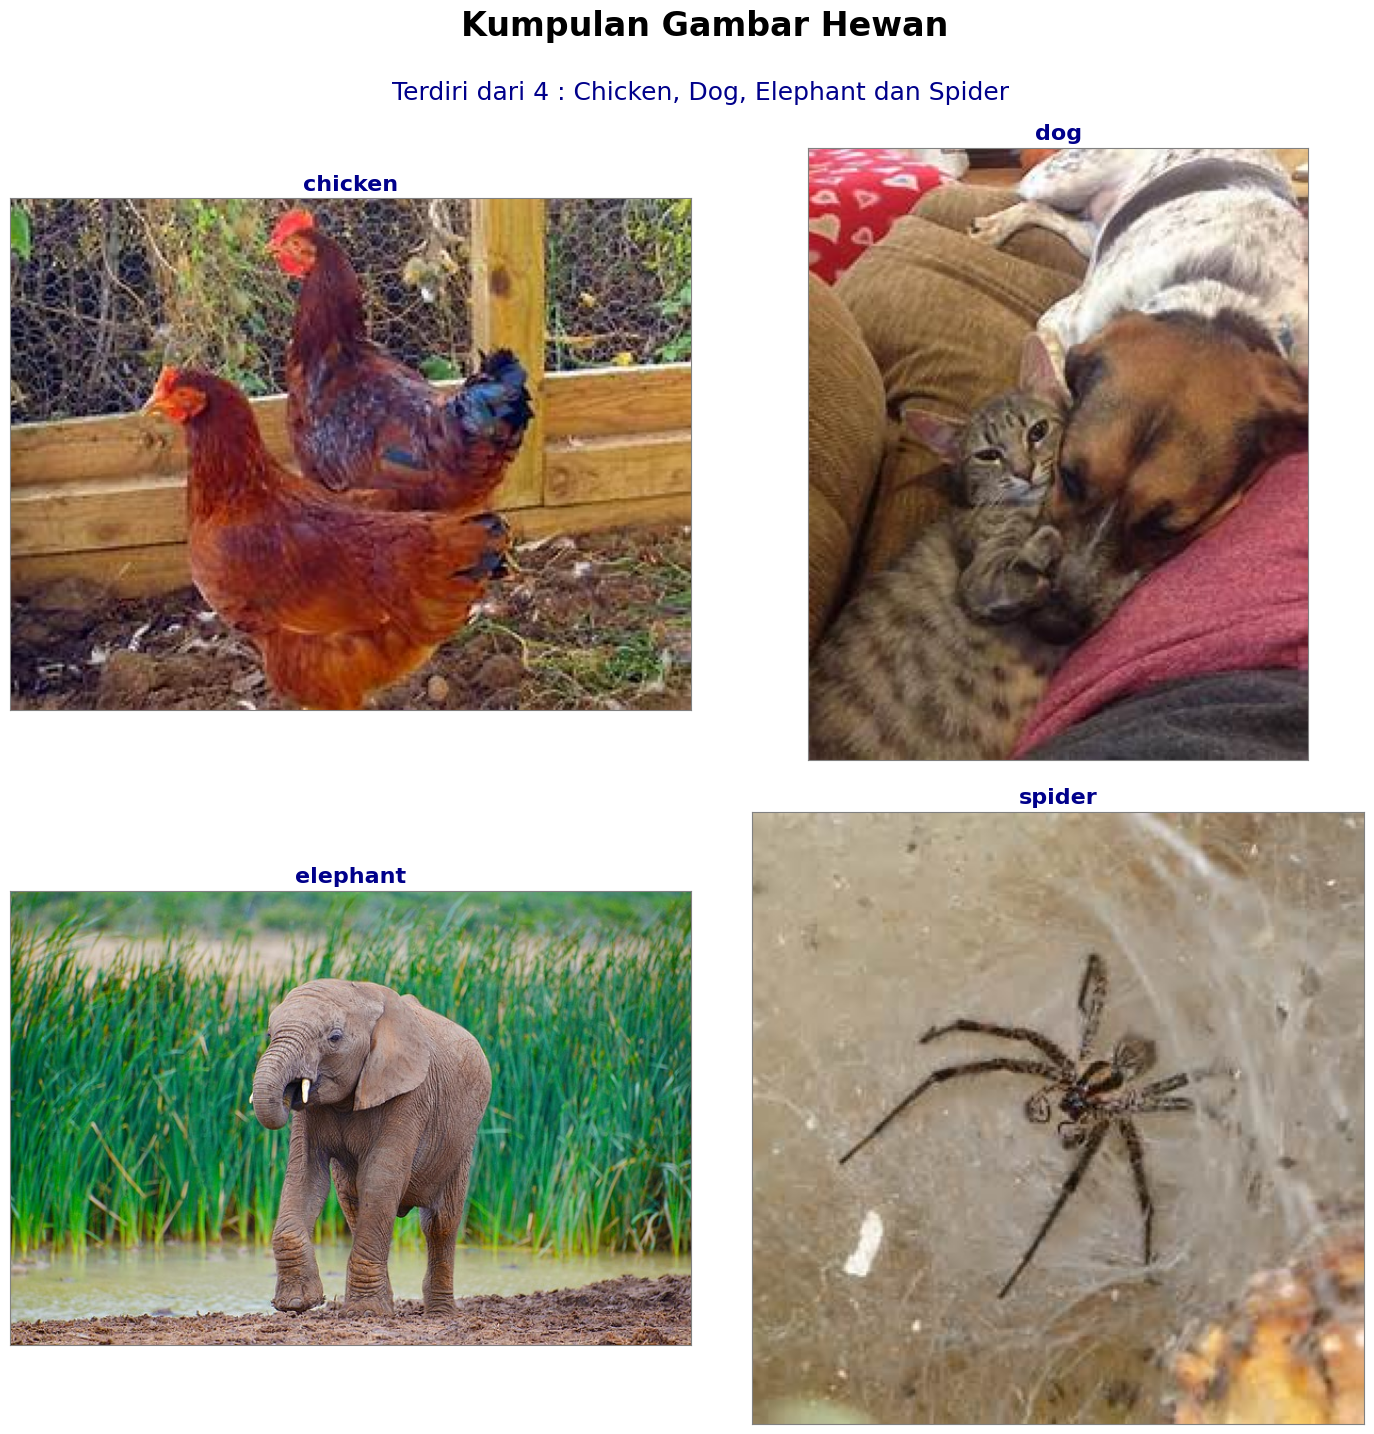

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullLocator


# Tentukan path ke direktori "raw-img" yang berada di dalam "animals/animals10"
animals_path = '/content/animals/animals10/raw-img/'

# Dapatkan daftar isi dari direktori "raw-img"
list_animals = os.listdir(animals_path)

# Membuat subplot 2x2 dengan ukuran gambar 15x15 inch
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle("Kumpulan Gambar Hewan", fontsize=24, fontweight='bold', y=0.98)

# Menambahkan judul subplot
fig.text(0.5, 0.92, 'Terdiri dari 4 : Chicken, Dog, Elephant dan Spider ', ha='center', fontsize=18, color='darkblue')

# Mengurutkan daftar hewan secara alfabetis
animals_sorted = sorted(list_animals)

# Inisialisasi variabel untuk mengakses indeks hewan
animals_id = 0

# Iterasi untuk menampilkan gambar secara acak dari setiap hewan
for i in range(2):
    for j in range(2):
        try:
            animals_selected = animals_sorted[animals_id]
            animals_id += 1
        except IndexError:
            break

        # Skip direktori '.TEMP' jika ada
        if animals_selected == '.TEMP':
            continue

        # Memilih gambar secara acak dari setiap hewan
        animals_selected_images = os.listdir(os.path.join(animals_path, animals_selected))
        animals_selected_random = np.random.choice(animals_selected_images)

        # Membaca dan menampilkan gambar menggunakan plt.imread dan ax.imshow
        img = plt.imread(os.path.join(animals_path, animals_selected, animals_selected_random))
        ax[i][j].imshow(img)

        # Tambahkan judul pada setiap subplot
        ax[i][j].set_title(animals_selected, pad=6, fontsize=16, fontweight='bold', color='darkblue')

        # Menyembunyikan sumbu x dan y pada subplot
        ax[i][j].xaxis.set_major_locator(NullLocator())
        ax[i][j].yaxis.set_major_locator(NullLocator())

        # Menambahkan garis pembatas antar subplot
        ax[i][j].spines['top'].set_color('gray')
        ax[i][j].spines['right'].set_color('gray')
        ax[i][j].spines['bottom'].set_color('gray')
        ax[i][j].spines['left'].set_color('gray')

# Menambahkan padding antara subplot
plt.tight_layout(pad=4, h_pad=2, w_pad=2)

# Menampilkan plot
plt.show()


*proses augmentasi data*

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Membuat objek ImageDataGenerator dengan konfigurasi augmentasi data
train_datagen = ImageDataGenerator(
    rotation_range=40,               # Memutar gambar hingga 40 derajat secara acak
    width_shift_range=0.2,           # Menggeser gambar secara horizontal hingga 20%
    height_shift_range=0.2,          # Menggeser gambar secara vertikal hingga 20%
    rescale=1/255,                   # Normalisasi nilai piksel ke rentang [0, 1]
    shear_range=0.2,                 # Mengaplikasikan transformasi shear hingga 20%
    zoom_range=0.2,                  # Memperbesar gambar secara acak hingga 20%
    horizontal_flip=True,            # Membalik gambar secara horizontal secara acak
    fill_mode='nearest',             # Strategi pengisian piksel baru dengan nilai terdekat
    validation_split=0.2             # Memisahkan 20% data untuk validasi
)


import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Menentukan path direktori dataset
animals = os.path.join('/content/animals/animals10/raw-img/')

# Mengatur ukuran batch
batch_size = 128

# Membuat generator untuk data pelatihan
data_train = train_datagen.flow_from_directory(
    animals,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Membuat generator untuk data validasi
data_val = train_datagen.flow_from_directory(
    animals,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)


Found 11384 images belonging to 4 classes.
Found 2844 images belonging to 4 classes.


*Pembangunan, kompilasi, dan visualisasi model neural network menggunakan TensorFlow*

In [14]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

# Mengatur penggunaan GPU
tf.device('/device:GPU:0')

# Membangun model CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

# Mengompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Visualisasi model dan menyimpan gambar model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Menampilkan ringkasan model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [15]:
import tensorflow as tf

class AkurasiCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # Mengatasi kasus di mana logs mungkin None
        logs = logs or {}

        # Mendapatkan nilai akurasi dari logs
        accuracy = logs.get('accuracy')
        val_accuracy = logs.get('val_accuracy')

        # Memeriksa apakah akurasi pelatihan dan validasi di atas 92%
        if accuracy is not None and val_accuracy is not None and accuracy > 0.92 and val_accuracy > 0.92:
            print("\nAkurasi di atas 92% pada pelatihan dan validasi. Menghentikan pelatihan.")
            self.model.stop_training = True

# Membuat objek dari kelas callback
callbacks = AkurasiCallback()


In [16]:
# Import library TensorFlow
import tensorflow as tf

# Mendefinisikan kelas callback
class AkurasiCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # Mengatasi kasus di mana logs mungkin None
        logs = logs or {}

        # Mendapatkan nilai akurasi dari logs
        accuracy = logs.get('accuracy')
        val_accuracy = logs.get('val_accuracy')

        # Memeriksa apakah akurasi pelatihan dan validasi di atas 92%
        if accuracy is not None and val_accuracy is not None and accuracy > 0.92 and val_accuracy > 0.92:
            print("\nAkurasi di atas 92% pada pelatihan dan validasi. Menghentikan pelatihan.")
            self.model.stop_training = True

# Membuat objek dari kelas callback
callbacks = AkurasiCallback()

# Melakukan pelatihan model
history = model.fit(
    data_train,  # Generator data pelatihan
    epochs=30,  # Jumlah epoch
    steps_per_epoch=data_train.samples // batch_size,  # Jumlah langkah per epoch
    validation_data=data_val,  # Data validasi
    validation_steps=data_val.samples // batch_size,  # Jumlah langkah validasi
    verbose=1,  # Menampilkan log pelatihan secara terperinci
    callbacks=[callbacks]  # Menambahkan callback untuk memantau akurasi dan menghentikan pelatihan
)


Epoch 1/30
88/88 [==============================] - 114s 1s/step - loss: 1.2419 - accuracy: 0.4140 - val_loss: 1.1638 - val_accuracy: 0.5018
Epoch 2/30
88/88 [==============================] - 102s 1s/step - loss: 1.0511 - accuracy: 0.5680 - val_loss: 0.9832 - val_accuracy: 0.5870
Epoch 3/30
88/88 [==============================] - 102s 1s/step - loss: 0.9255 - accuracy: 0.6275 - val_loss: 0.8546 - val_accuracy: 0.6417
Epoch 4/30
88/88 [==============================] - 122s 1s/step - loss: 0.7936 - accuracy: 0.6971 - val_loss: 0.7074 - val_accuracy: 0.7322
Epoch 5/30
88/88 [==============================] - 122s 1s/step - loss: 0.7149 - accuracy: 0.7297 - val_loss: 0.6682 - val_accuracy: 0.7418
Epoch 6/30
88/88 [==============================] - 100s 1s/step - loss: 0.6227 - accuracy: 0.7653 - val_loss: 0.7738 - val_accuracy: 0.6850
Epoch 7/30
88/88 [==============================] - 100s 1s/step - loss: 0.6151 - accuracy: 0.7663 - val_loss: 0.5727 - val_accuracy: 0.7876
Epoch 8/30
88

*Visualisasi Loss*

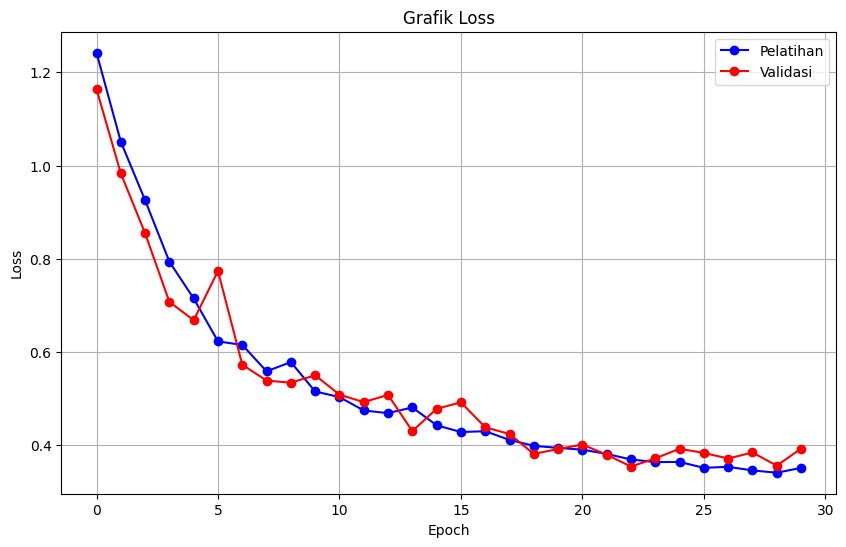

In [17]:
import matplotlib.pyplot as plt

# Grafik loss pada setiap epoch
plt.figure(figsize=(10, 6))

plt.plot(history.history['loss'], marker='o', linestyle='-', color='b', label='Pelatihan')
plt.plot(history.history['val_loss'], marker='o', linestyle='-', color='r', label='Validasi')

plt.title('Grafik Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Menambahkan grid untuk memudahkan pembacaan
plt.grid(True)

# Menampilkan grafik
plt.show()


*Visualisasi Akurasi*

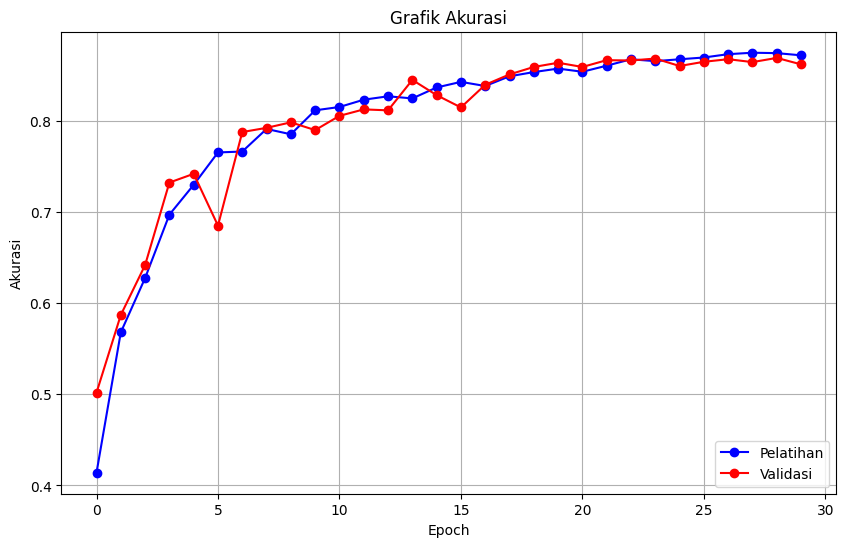

In [18]:
import matplotlib.pyplot as plt

# Grafik akurasi pada setiap epoch
plt.figure(figsize=(10, 6))

plt.plot(history.history['accuracy'], marker='o', linestyle='-', color='b', label='Pelatihan')
plt.plot(history.history['val_accuracy'], marker='o', linestyle='-', color='r', label='Validasi')

plt.title('Grafik Akurasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend(loc='lower right')

# Menambahkan grid untuk memudahkan pembacaan
plt.grid(True)

# Menampilkan grafik
plt.show()


In [22]:
import tensorflow as tf

# Menggunakan opsional optimizations untuk converter
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Konversi model ke format TFLite
tflite_model = converter.convert()

# Menyimpan model TFLite ke dalam file
with open('model_optimized.tflite', 'wb') as f:
    f.write(tflite_model)


!ls -la | grep 'modeling'
